In [12]:
"""
Step 1: Data Preprocessing -  Flowchart Detection (Kaggle)

This script restructures the "Flow chart detection.v2i.darknet" version of the Kaggle
Flowcharts dataset into the folder layout required by Ultralytics YOLOv8.

-------------------------------------------------------------------------------
Original Dataset Structure (Downloaded via kagglehub):

Flow chart detection.v2i.darknet/
├── train/
│   ├── flowchart1.jpg
│   ├── flowchart1.txt
├── val/
│   ├── flowchart2.jpg
│   ├── flowchart2.txt
├── test/
│   ├── flowchart3.jpg
│   ├── flowchart3.txt

Each image has a corresponding .txt annotation file in YOLO format.

-------------------------------------------------------------------------------
Target YOLOv8-Compatible Structure (Created by this script):

kaggle_flowchart_yolo/
├── images/
│   ├── train/
│   ├── val/
│   └── test/
├── labels/
│   ├── train/
│   ├── val/
│   └── test/

- Images are placed in images/<split>/
- Corresponding YOLO label files are placed in labels/<split>/


This notebook performs the following tasks:

1. **Download and Clean up Dataset**:
   - Downloads the "Flowchart Detection" dataset from Kaggle using `kagglehub`.
   - Removes any previously cached dataset to ensure fresh downloading.
   
2. **Dataset Organization**:
   - Restructures the downloaded Kaggle dataset into YOLOv8's required format (images and labels directories).
   - Moves images and label files into the appropriate folders (`images/train`, `images/valid`, `images/test`, etc.).

3. **Image Preprocessing**:
   - Preprocesses the images to make the text as readable as possible for OCR.
   - Applied techniques include:
     - Grayscale conversion
     - Histogram Equalization
     - Denoising (Gaussian Blur)
     - Thresholding (Binarization)
     - Sharpening
     - Resize (Optional)
   - Preprocessed images are saved in the target directory (`images`).
   - The preprocessing function is designed with toggles to easily enable or disable each preprocessing technique for experimentation.

4. **Image Comparison**:
   - Displays the original (unmodified) image alongside the preprocessed image for a visual comparison.
   - The comparison is done for a subset of the images (default is 20) for prototyping.
   - The images are displayed side by side for comparison, showing the effectiveness of the preprocessing steps applied.

5. **Logging**:
   - Logs the preprocessing and file movement activities to a file (`processing_log.txt`).
   - Allows tracking of the progress and potential issues during preprocessing and file movements.

6. **Progress Bar**:
   - A progress bar is displayed using `tqdm` to indicate the progress of image processing and comparison in the notebook.

-------------------------------------------------------------------------------
**Functions**:

1. `clean_up_folders_and_dirs(folders)`: 
   - Cleans up specified folders by deleting all their contents and the folders themselves.
   - Can be used to reset or clean directories before starting the new processing.

2. `preprocess_image(image_path, apply_grayscale=False, apply_hist_eq=False, apply_denoise=False, apply_threshold=False, apply_sharpening=True, apply_resize=False)`:
   - Preprocesses a given image by applying various techniques such as grayscale conversion, histogram equalization, denoising, thresholding, sharpening, and resizing.
   - Each preprocessing technique can be toggled on or off via function parameters.
   - Returns a preprocessed PIL image that is ready for OCR.

3. `move_and_preprocess_images(source_dir, target_images_dir, target_labels_dir, num_images=20)`:
   - Moves images and labels from the source directory to the target directories.
   - Applies preprocessing to the images and saves the preprocessed images to the target directory.
   - The function processes only the first `num_images` for prototyping.

4. `compare_images_for_all_processed_images(source_dir, num_images=20)`:
   - Compares the original and preprocessed images side by side for a sample of images.
   - Displays all 20 processed images side by side for comparison.
   - Provides a visual way to assess the quality of the preprocessing steps.

5. `clean_up_and_move(source_root, target_root)`:
   - A wrapper function to clean up and move the files into the correct YOLO directory structure (`images` and `labels`).
   - Ensures that the images are preprocessed and moved correctly while also renaming the `valid` folder to `val` to comply with YOLOv8 standards.

-------------------------------------------------------------------------------
**Usage**:
1. Run the initial cell to download and clean up the dataset.
2. Afterward, the script will automatically preprocess the dataset and save the preprocessed images in the `images` folder.
3. You can run the `compare_images_for_all_processed_images` function to view a side-by-side comparison of the original images and the preprocessed images.

**Outputs**:
- The images are stored in the `images` folder in the target directory (`kaggle_flowchart_yolo`).
- Logs of the preprocessing and file organization are saved to `processing_log.txt`.
- The comparison results are displayed in the notebook for the first 20 images processed.

**Caution**:
- Be sure to handle the dataset and file paths carefully. The script deletes files and folders, so use it with caution.
- The comparison function is designed to process a subset of images (default 20) for prototyping. Adjust this number as needed for larger datasets.
"""


'\nStep 1: Data Preprocessing -  Flowchart Detection (Kaggle)\n\nThis script restructures the "Flow chart detection.v2i.darknet" version of the Kaggle\nFlowcharts dataset into the folder layout required by Ultralytics YOLOv8.\n\n-------------------------------------------------------------------------------\nOriginal Dataset Structure (Downloaded via kagglehub):\n\nFlow chart detection.v2i.darknet/\n├── train/\n│   ├── flowchart1.jpg\n│   ├── flowchart1.txt\n├── val/\n│   ├── flowchart2.jpg\n│   ├── flowchart2.txt\n├── test/\n│   ├── flowchart3.jpg\n│   ├── flowchart3.txt\n\nEach image has a corresponding .txt annotation file in YOLO format.\n\n-------------------------------------------------------------------------------\nTarget YOLOv8-Compatible Structure (Created by this script):\n\nkaggle_flowchart_yolo/\n├── images/\n│   ├── train/\n│   ├── val/\n│   └── test/\n├── labels/\n│   ├── train/\n│   ├── val/\n│   └── test/\n\n- Images are placed in images/<split>/\n- Corresponding YOLO

In [28]:
!pip install kagglehub

# Clear out the cache and redownload the dataset

In [3]:
import kagglehub
import shutil
import os

# Path to the dataset cache on UVA Rivanna
cache_path = '/home/bm3pk/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset'  # change user name to your homedirectory

# Check if the dataset is cached and remove it
if os.path.exists(cache_path):
    shutil.rmtree(cache_path)  # Be cautious, this deletes the entire folder
    print(f"Removed cached dataset from {cache_path}")

# Download the Kaggle Flowcharts dataset

In [2]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yaswanthkrishna2002/flowcharts-dataset")

print("Path to dataset files:", path)

100%|██████████| 74.8M/74.8M [00:00<00:00, 156MB/s] 

Extracting files...


Path to dataset files: /home/dfe2zj/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3


# Clean-Up the Kaggle_flowchart_yolo to start over

In [5]:
import os
import shutil

def clean_up_folders_and_dirs(folders):
    """
    Clean up the specified folders by deleting all their contents and then the folders themselves.
    
    Parameters:
    -----------
    folders : list of str
        List of folder paths to clean. The folder and all contents will be deleted.
    """
    for folder in folders:
        if os.path.exists(folder):
            # Delete contents of the folder
            for fname in os.listdir(folder):
                file_path = os.path.join(folder, fname)
                try:
                    if os.path.isfile(file_path) or os.path.islink(file_path):
                        os.remove(file_path)
                        print(f"Deleted file: {file_path}")
                    elif os.path.isdir(file_path):
                        shutil.rmtree(file_path)
                        print(f"Deleted directory: {file_path}")
                except Exception as e:
                    print(f"Failed to delete {file_path}. Reason: {e}")
            
            # After cleaning contents, delete the folder itself
            try:
                os.rmdir(folder)
                print(f"Deleted folder: {folder}")
            except Exception as e:
                print(f"Failed to delete folder {folder}. Reason: {e}")
        else:
            print(f"Folder not found: {folder}")

# Clean up the images and labels folders along with the folder itself
clean_up_folders_and_dirs(["kaggle_flowchart_yolo/images", "kaggle_flowchart_yolo/labels", "kaggle_flowchart_yolo"])


Deleted directory: kaggle_flowchart_yolo/images/train
Deleted directory: kaggle_flowchart_yolo/images/val
Deleted directory: kaggle_flowchart_yolo/images/.ipynb_checkpoints
Deleted directory: kaggle_flowchart_yolo/images/test
Deleted folder: kaggle_flowchart_yolo/images
Deleted directory: kaggle_flowchart_yolo/labels/train
Deleted directory: kaggle_flowchart_yolo/labels/val
Deleted file: kaggle_flowchart_yolo/labels/train.cache
Deleted file: kaggle_flowchart_yolo/labels/val.cache
Deleted directory: kaggle_flowchart_yolo/labels/.ipynb_checkpoints
Deleted directory: kaggle_flowchart_yolo/labels/test
Deleted folder: kaggle_flowchart_yolo/labels
Deleted file: kaggle_flowchart_yolo/data.yaml
Deleted directory: kaggle_flowchart_yolo/.ipynb_checkpoints
Deleted folder: kaggle_flowchart_yolo


# Preprocessing

In [6]:
#Install Libraries

import os
import numpy as np
import shutil
from pathlib import Path
from PIL import Image, ImageEnhance
import cv2
import logging
import sys
from tqdm.notebook import tqdm  # Import tqdm for notebook progress bar

In [7]:
# --- Configuration ---
source_root = Path.home() / ".cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet"
target_root = Path.cwd() / "kaggle_flowchart_yolo"
images_dir = target_root / "images"
labels_dir = target_root / "labels"

# Subsets to process
splits = ["train", "valid", "test"]

# Set up logging to a file
logging.basicConfig(filename='processing_log.txt', level=logging.INFO, format='%(asctime)s - %(message)s')


# Pre-Process Images to Improve Quality for OCR

In [8]:
# --- Preprocessing Function ---
def preprocess_image(image_path, apply_grayscale=True, apply_hist_eq=False, apply_denoise=True, apply_threshold=False, apply_sharpening=True, apply_resize=False):
    """
    Preprocess the image to make the text as readable as possible for OCR.
    Techniques applied:
    - Grayscale conversion
    - Histogram Equalization
    - Denoising
    - Thresholding (Binarization)
    - Sharpening
    - Resize

    Arguments:
    image_path : Path to the image to be preprocessed.
    apply_grayscale : bool : Whether to convert image to grayscale (default is True).
    apply_hist_eq : bool : Whether to apply histogram equalization (default is True).
    apply_denoise : bool : Whether to apply Gaussian blur for denoising (default is True).
    apply_threshold : bool : Whether to apply thresholding for binarization (default is True).
    apply_sharpening : bool : Whether to apply sharpening (default is True).
    apply_resize : bool : Whether to resize the image (default is True).

    Returns:
    PIL Image: Preprocessed image ready for OCR.
    """
    # Load the image in RGB
    img = Image.open(image_path).convert("RGB")
    img_array = np.array(img)

    # Convert to Grayscale
    if apply_grayscale:
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
    else:
        gray = img_array

    # Histogram Equalization
    if apply_hist_eq:
        gray = cv2.equalizeHist(gray)

    # Denoising (Gaussian Blur)
    if apply_denoise:
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding (Binarization)
    if apply_threshold:
        _, binarized = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    else:
        binarized = gray

    # Sharpening using a kernel
    if apply_sharpening:
        kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
        sharpened = cv2.filter2D(binarized, -1, kernel)
    else:
        sharpened = binarized

    # Resize the image (double the resolution)
    if apply_resize:
        height, width = sharpened.shape
        resized = cv2.resize(sharpened, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
    else:
        resized = sharpened

    # Convert back to PIL image
    preprocessed_img = Image.fromarray(resized)
    return preprocessed_img


# Move and Preprocess Images at the Same Time
## set the num_images = None to process all images from the test set -  This should be done for training - step 3.

In [9]:
# --- Moving and Preprocessing Images ---
def move_and_preprocess_images(source_dir, target_images_dir, target_labels_dir, num_images=None):
    """
    Move and preprocess images from the source to the target directories while applying OCR preprocessing.
    If `num_images` is None, processes all images in the dataset.

    Arguments:
    source_dir : Path to the source directory containing the images.
    target_images_dir : Path to the target directory for storing preprocessed images.
    target_labels_dir : Path to the target directory for storing labels.
    num_images : int or None : Number of images to process (default is None, which processes all images).
    """
    processed_images_count = 0

    for split in splits:
        src_split_path = source_dir / split
        files = os.listdir(src_split_path)
        
        # If num_images is set, only process the first `num_images` images
        if num_images:
            files = files[:num_images]

        # Create target directory if it doesn't exist
        target_split_path = target_images_dir / split
        target_split_path.mkdir(parents=True, exist_ok=True)

        # Create target labels directory if it doesn't exist
        label_target_dir = target_labels_dir / split
        label_target_dir.mkdir(parents=True, exist_ok=True)

        # Add a progress bar
        for file in tqdm(files, desc=f"Processing {split} images", unit="file"):
            full_path = src_split_path / file
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Preprocess the image
                preprocessed_img = preprocess_image(full_path)

                # Save preprocessed image to the appropriate target directory
                target_path = target_split_path / file
                preprocessed_img.save(target_path)

                logging.info(f"Moved and preprocessed image: {file} to {target_path}")
                processed_images_count += 1

            elif file.endswith(".txt"):
                # Ensure target labels directory exists
                shutil.copy(full_path, label_target_dir / file)
                logging.info(f"Copied label file: {file} to {label_target_dir / file}")
        
    logging.info(f"Processed {processed_images_count} images.")


# Rename the 'valid' folder to 'val' to match YOLO's directory structure

In [10]:
# Rename the 'valid' folder to 'val' to match YOLO's directory structure
if (images_dir / "valid").exists():
        os.rename(images_dir / "valid", images_dir / "val")
        os.rename(labels_dir / "valid", labels_dir / "val")
        logging.info("Renamed 'valid' folder to 'val'.")

logging.info("Dataset successfully moved and preprocessed.")

# Move and Process the file

In [11]:
#--- Clean up and move directories ---
def move_and_process(source_root, target_root):
    """
    Clean up the source directory by moving files into the correct structure and preprocessing them.
    """
    logging.info("Starting to move and preprocess images...")
    move_and_preprocess_images(source_root, images_dir, labels_dir)

 # --- Execute the Cleanup and File Movement Process ---
move_and_process(source_root, target_root)  

Processing train images:   0%|          | 0/3007 [00:00<?, ?file/s]

Processing valid images:   0%|          | 0/503 [00:00<?, ?file/s]

Processing test images:   0%|          | 0/791 [00:00<?, ?file/s]

# Compare Results of Pre-Processing

Processing train images:   0%|          | 0/5 [00:00<?, ?file/s]

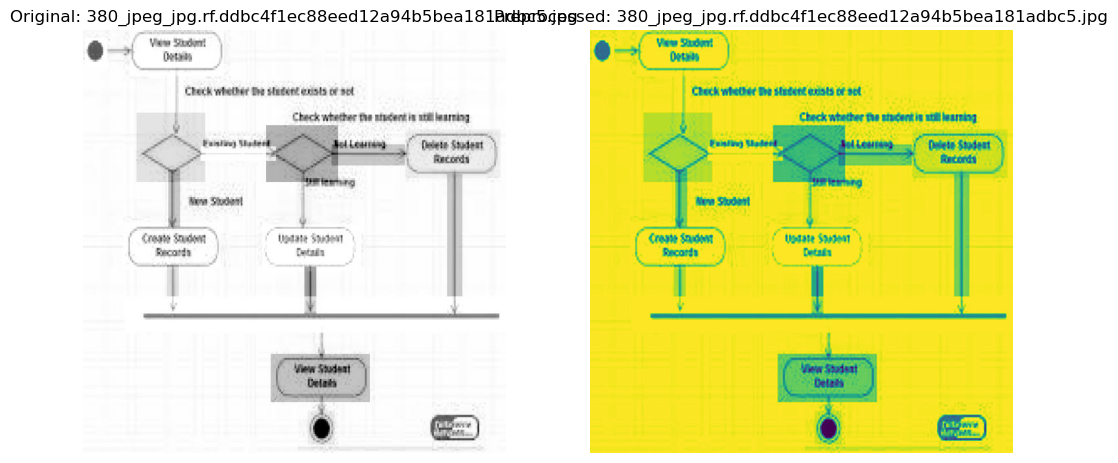

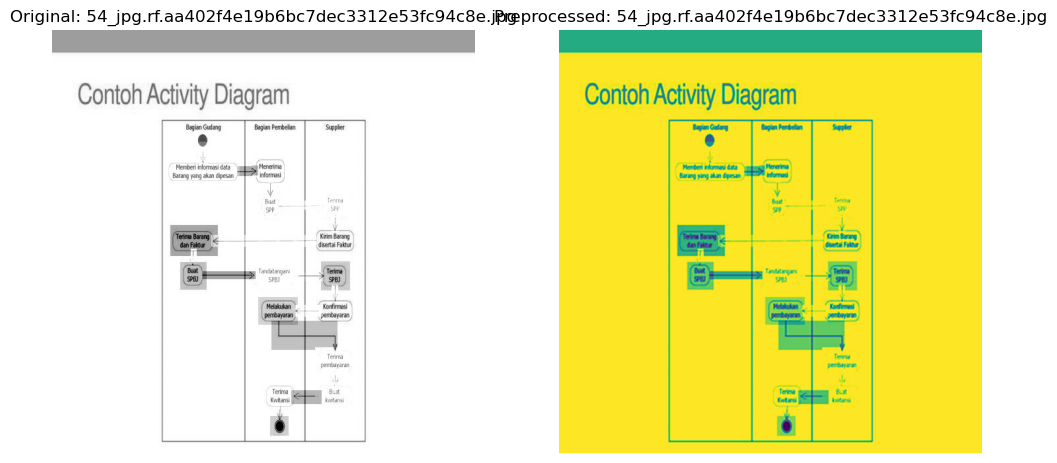

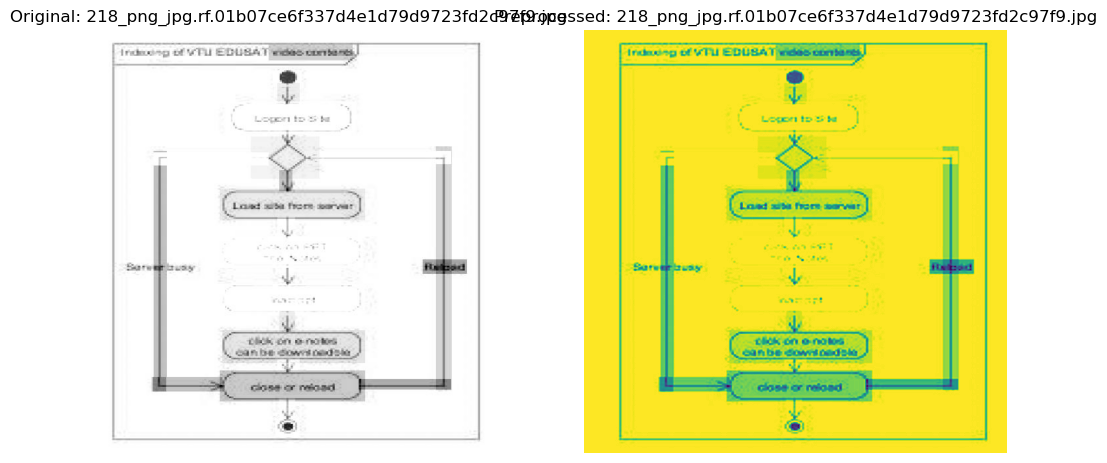

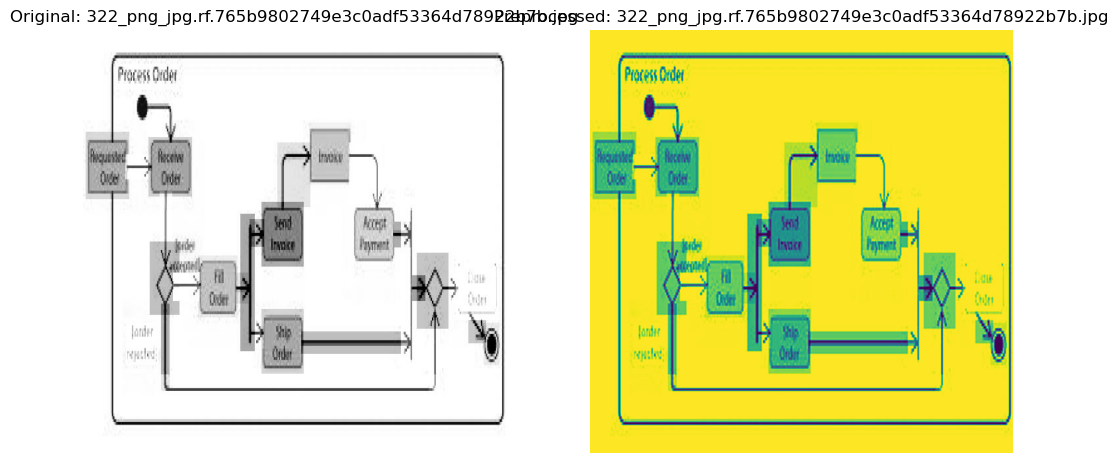

Processing valid images:   0%|          | 0/5 [00:00<?, ?file/s]

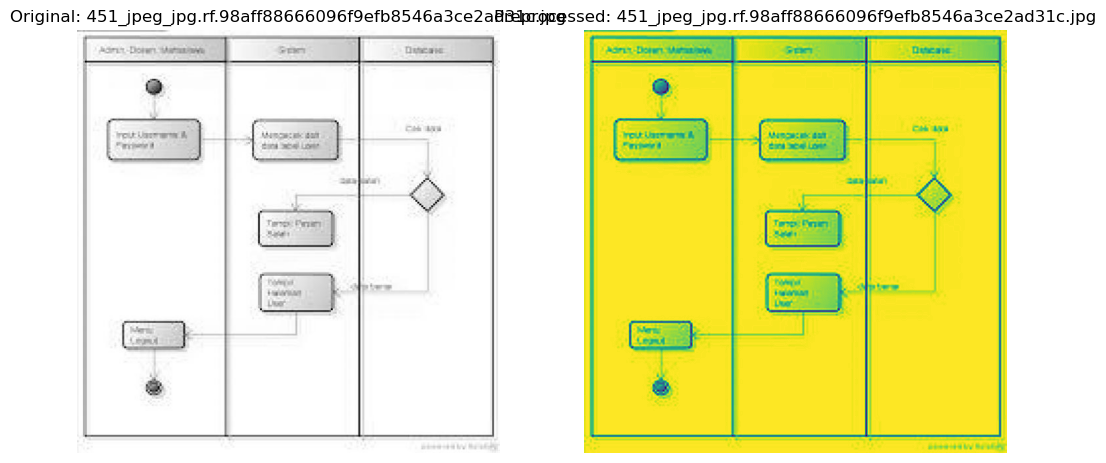

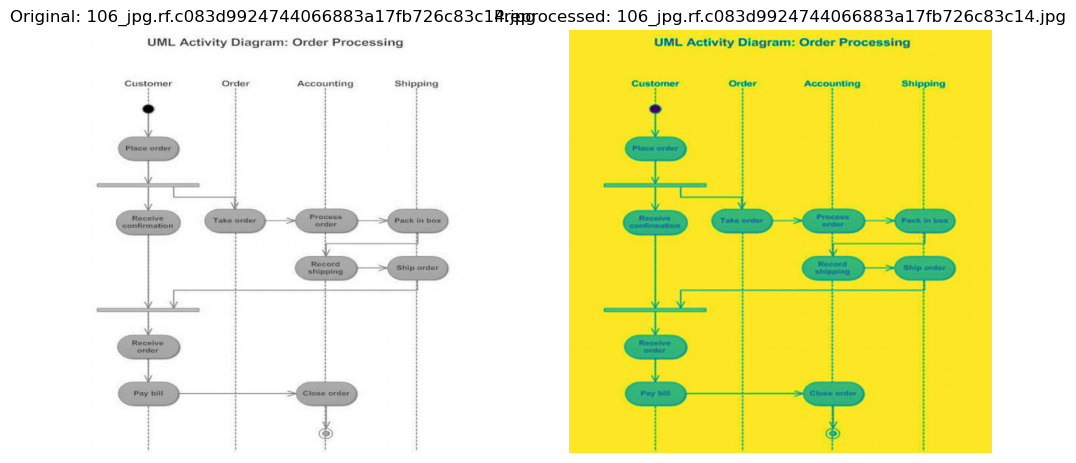

Processing test images:   0%|          | 0/5 [00:00<?, ?file/s]

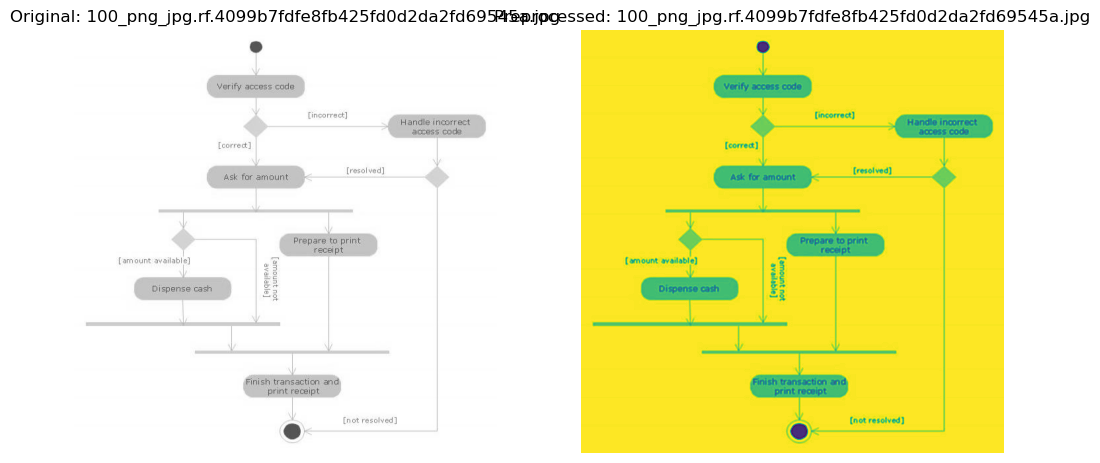

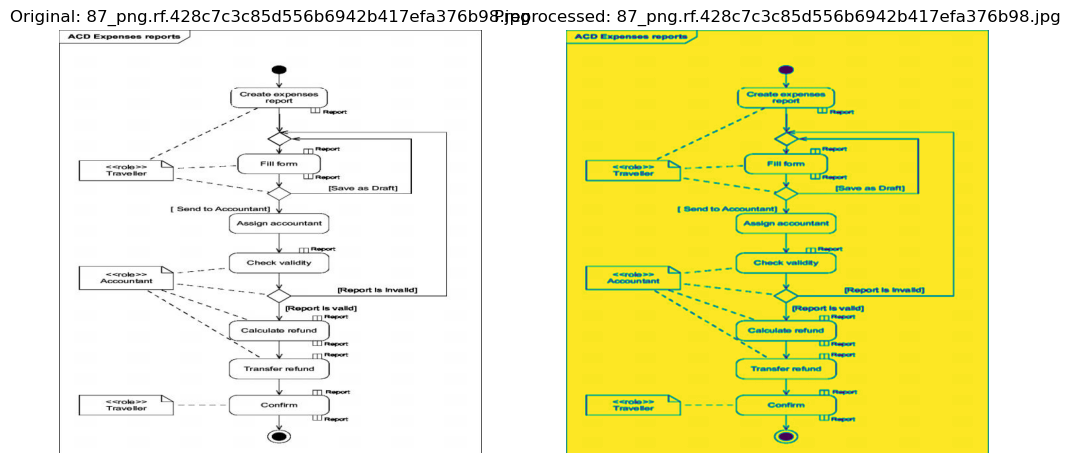

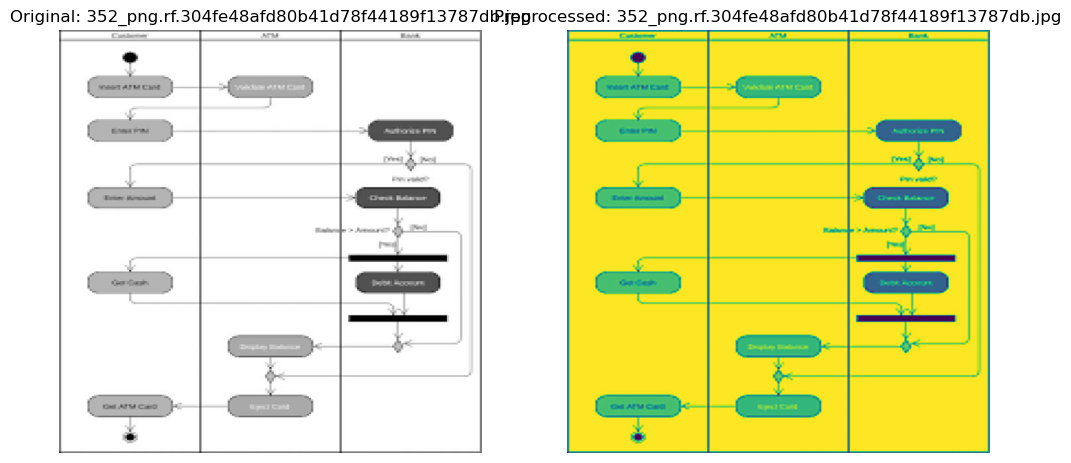

Compared 9 images.


In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def display_comparison(original_image_path, preprocessed_image, image_name):
    """
    Display the original and preprocessed image side by side for comparison.
    
    Arguments:
    original_image_path : str : Path to the original image.
    preprocessed_image : PIL Image : Preprocessed image for comparison.
    image_name : str : Name of the image for title.
    """
    # Open the original image
    original_img = Image.open(original_image_path)

    # Set up the matplotlib figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the original image
    axes[0].imshow(np.array(original_img))
    axes[0].set_title(f"Original: {image_name}")
    axes[0].axis('off')
    
    # Display the preprocessed image
    axes[1].imshow(np.array(preprocessed_image))
    axes[1].set_title(f"Preprocessed: {image_name}")
    axes[1].axis('off')

    plt.show()


# Function to compare the original image with the preprocessed one for all 20 images
def compare_images_for_all_processed_images(source_dir, num_images=5):
    """
    Compare the original and preprocessed images side by side for all images processed.
    
    Arguments:
    source_dir : Path : Source directory where the original images are stored.
    num_images : int : Number of images to process and compare.
    """
    images_processed = 0
    for split in splits:
        src_split_path = source_dir / split
        files = os.listdir(src_split_path)
        
        # Process the first `num_images` files for prototyping
        files = files[:num_images]
        
        for file in tqdm(files, desc=f"Processing {split} images", unit="file"):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                full_path = src_split_path / file
                
                # Preprocess the image
                preprocessed_img = preprocess_image(full_path)

                # Display comparison
                display_comparison(full_path, preprocessed_img, file)
                
                images_processed += 1

    print(f"Compared {images_processed} images.")


# Call the function to compare images  based on number of images
compare_images_for_all_processed_images(source_root, num_images=5)
